# Streamlit Deploy Link

https://beansmulticalassificationgit-yhxvcxnzsxnbvhwusvccwp.streamlit.app/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew as sk, stats
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
import joblib

In [2]:
df = pd.read_csv('/content/beans.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.shape

(13611, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
df.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [7]:
df.duplicated().sum()

np.int64(68)

In [8]:
# remove duplicate
df.drop_duplicates(inplace=True)

In [9]:
df.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

#MAPPING

In [10]:

import joblib

df['Class'] = df['Class'].str.strip().str.upper()
df['Class'] = df['Class'].astype('category')
df['Class_Code'] = df['Class'].cat.codes
class_mapping = dict(enumerate(df['Class'].cat.categories))
joblib.dump(class_mapping, 'class_mapping.pkl')
df['Class'] = df['Class_Code']
df.drop(columns=['Class_Code'], inplace=True)

print("✅ Class column converted to numeric codes.")


✅ Class column converted to numeric codes.


In [11]:
df['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3], dtype=int8)

In [12]:
for column in ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']:
    print(f"Unique values for '{column}': {df[column].unique()}")

Unique values for 'Area': [28395 28734 29380 ... 42139 42147 42159]
Unique values for 'Perimeter': [610.291 638.018 624.11  ... 759.321 763.779 772.237]
Unique values for 'MajorAxisLength': [208.1781167 200.5247957 212.8261299 ... 281.5399279 283.3826364
 295.142741 ]
Unique values for 'MinorAxisLength': [173.888747  182.7344194 175.9311426 ... 191.1879789 190.2757308
 182.2047159]
Unique values for 'AspectRation': [1.19719142 1.09735646 1.20971266 ... 1.47258175 1.48932623 1.61984139]
Unique values for 'Eccentricity': [0.54981219 0.41178525 0.56272732 ... 0.73406478 0.74105479 0.78669302]
Unique values for 'ConvexArea': [28715 29172 29690 ... 42494 42667 42600]
Unique values for 'EquivDiameter': [190.1410973 191.2727505 193.4109041 ... 231.6312612 231.6532475
 231.6862231]
Unique values for 'Extent': [0.76392252 0.78396813 0.77811325 ... 0.72993244 0.70538912 0.7889625 ]
Unique values for 'Solidity': [0.988856   0.9849856  0.98955877 ... 0.98989875 0.9878126  0.98964789]
Unique values

# Univariate Analysis

#Distribution of a Key Metric (e.g., Bean Area) - Identifying Common Sizes & Skewness

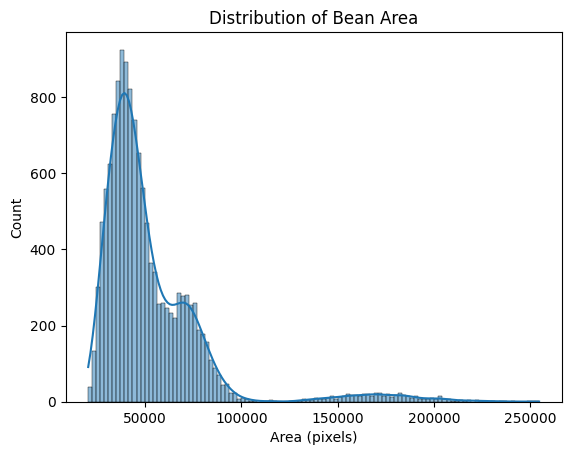

In [13]:
sns.histplot(df['Area'], kde=True); plt.title('Distribution of Bean Area'); plt.xlabel('Area (pixels)'); plt.ylabel('Count'); plt.show()

In [14]:
print("Counts of 'Perimeter' values in 10 equal bins:\n", pd.cut(df['Perimeter'], bins=10).value_counts().sort_index())

Counts of 'Perimeter' values in 10 equal bins:
 Perimeter
(523.275, 670.799]      2118
(670.799, 816.863]      5303
(816.863, 962.926]      2502
(962.926, 1108.99]      2444
(1108.99, 1255.053]      626
(1255.053, 1401.116]      54
(1401.116, 1547.18]      175
(1547.18, 1693.243]      235
(1693.243, 1839.307]      75
(1839.307, 1985.37]       11
Name: count, dtype: int64


#Count of Each Bean Class - Assessing Production Volume & Imbalance.

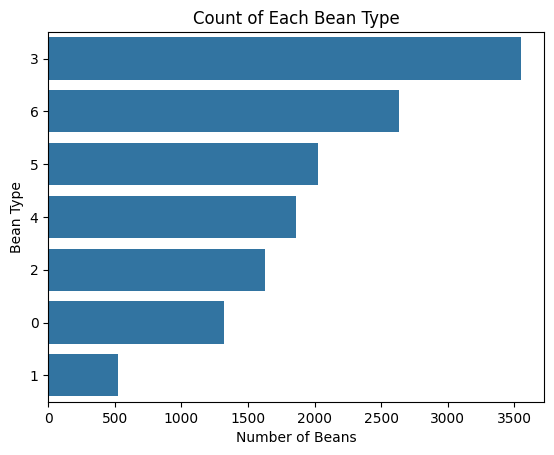

In [15]:
sns.countplot(data=df, y='Class', order=df['Class'].value_counts().index); plt.title('Count of Each Bean Type'); plt.xlabel('Number of Beans'); plt.ylabel('Bean Type'); plt.show()

#Distribution of a Ratio (e.g., Aspect Ratio) - Quality Control & Consistency

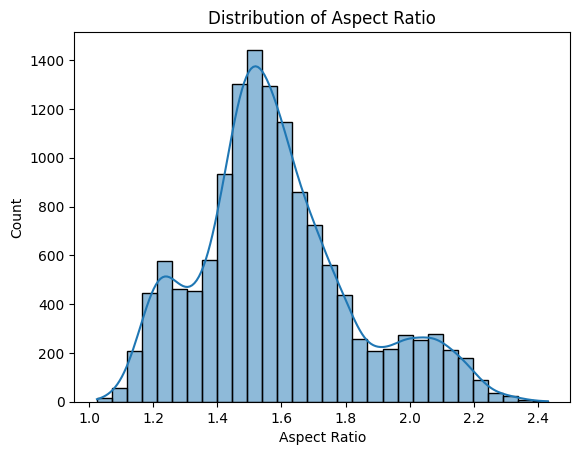

In [16]:
sns.histplot(df['AspectRation'], kde=True, bins=30); plt.title('Distribution of Aspect Ratio'); plt.xlabel('Aspect Ratio'); plt.ylabel('Count'); plt.show()

#Density Plot for Shape Factor (e.g., Compactness) - Identifying Sub-populations/Anomalies

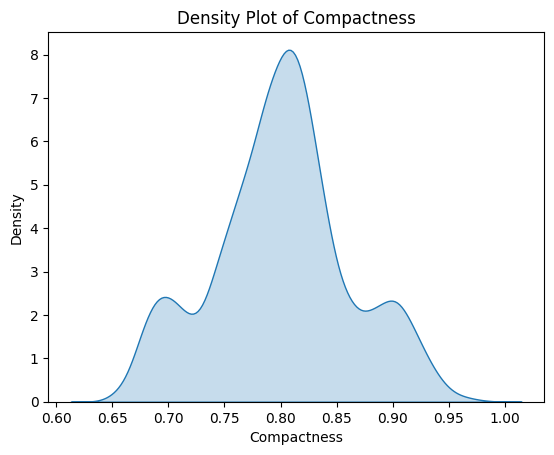

In [17]:
sns.kdeplot(df['Compactness'], fill=True); plt.title('Density Plot of Compactness'); plt.xlabel('Compactness'); plt.ylabel('Density'); plt.show()

#Box Plot of a Feature - Identifying Outliers and Data Quality Issues

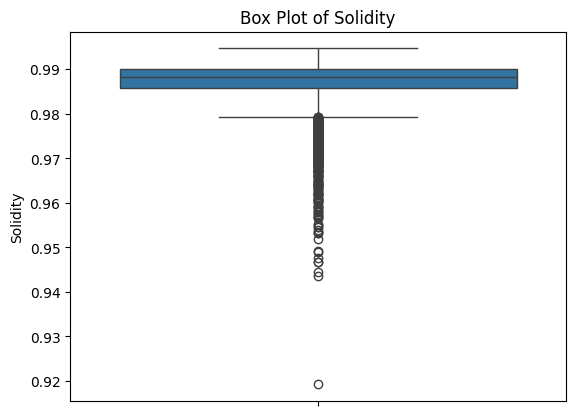

In [18]:
sns.boxplot(y=df['Solidity']); plt.title('Box Plot of Solidity'); plt.ylabel('Solidity'); plt.show()

#Multivariate Analysis

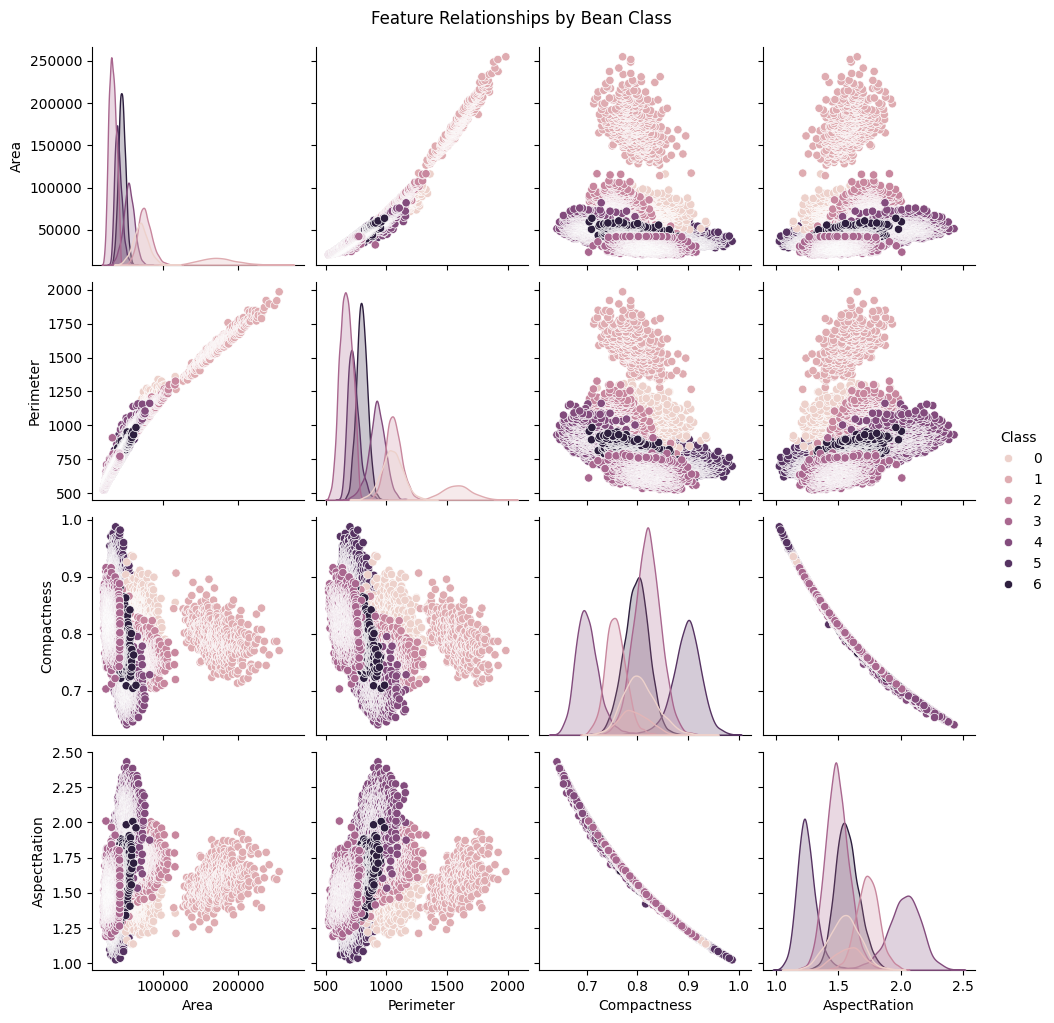

In [19]:
sns.pairplot(df, hue='Class', vars=['Area', 'Perimeter', 'Compactness', 'AspectRation']); plt.suptitle('Feature Relationships by Bean Class', y=1.02); plt.show()

#Correlation Heatmap - Identifying Redundant Features & Potential Issues

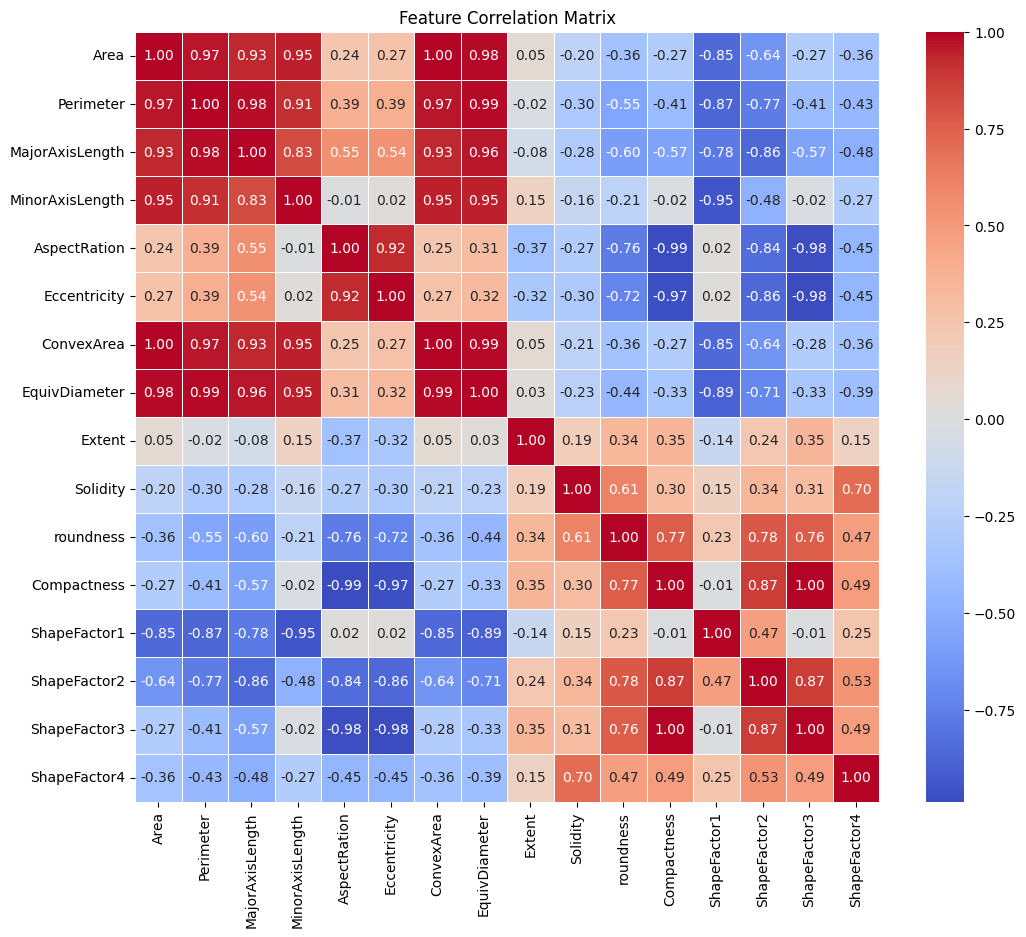

In [20]:
plt.figure(figsize=(12, 10)); sns.heatmap(df.drop('Class', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5); plt.title('Feature Correlation Matrix'); plt.show()

✅ **Strong Positive Correlations (r > 0.9):**

Area, Perimeter, ConvexArea, and EquivDiameter are highly correlated with each other (r ≈ 0.97 to 1.00).

MajorAxisLength and MinorAxisLength are also strongly correlated with Area and Perimeter (r > 0.9).

ShapeFactor2, ShapeFactor3, and Compactness show high inter-correlation (r > 0.85).

**❌ Strong Negative Correlations (r < -0.8):**

Eccentricity is highly negatively correlated with ShapeFactor3 (r = -0.97).

AspectRatio and ShapeFactor3 also show a strong negative correlation (r = -0.98).

ShapeFactor1 and Perimeter, Area, and other size-related metrics show strong negative correlations (r ≈ -0.85 to -0.9).

**⚖️ Low or Weak Correlations (-0.3 < r < 0.3):**

Extent has relatively low correlation with most other features.

Solidity shows weak to moderate correlations across the board, mostly staying below ±0.3 with the exception of a few shape-related features like Compactness and roundness.



#Box Plot of Key Feature by Class - Quality Control & Class-Specific Variation

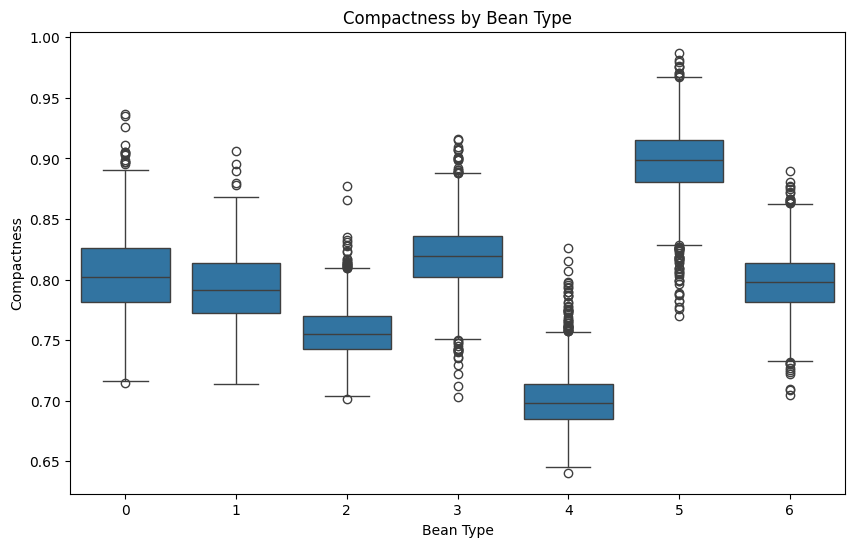

In [21]:
plt.figure(figsize=(10, 6)); sns.boxplot(data=df, x='Class', y='Compactness'); plt.title('Compactness by Bean Type'); plt.xlabel('Bean Type'); plt.ylabel('Compactness'); plt.show()

#Violin Plot of Shape Factor by Class - Detailed Distribution & Density for Each Type

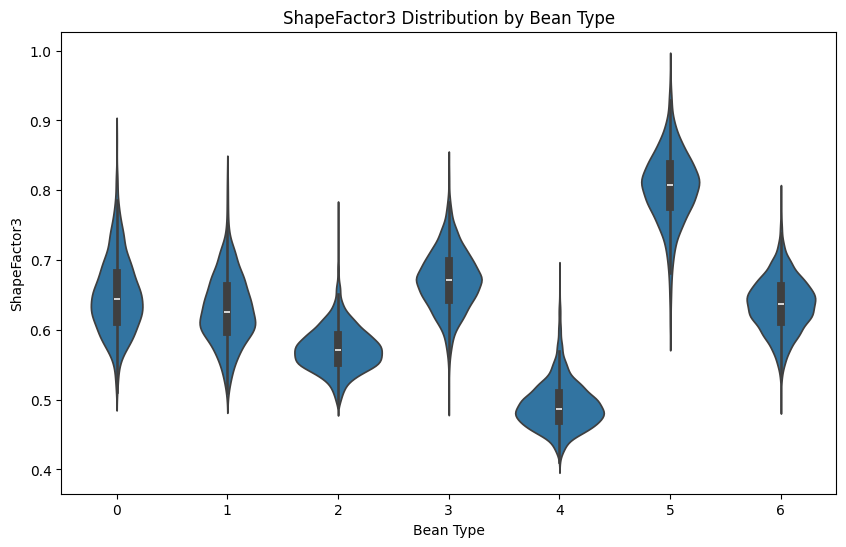

In [22]:
plt.figure(figsize=(10, 6)); sns.violinplot(data=df, x='Class', y='ShapeFactor3'); plt.title('ShapeFactor3 Distribution by Bean Type'); plt.xlabel('Bean Type'); plt.ylabel('ShapeFactor3'); plt.show()

#Scatter Plot of Two Discriminative Features Colored by Class - Identifying Decision Boundaries

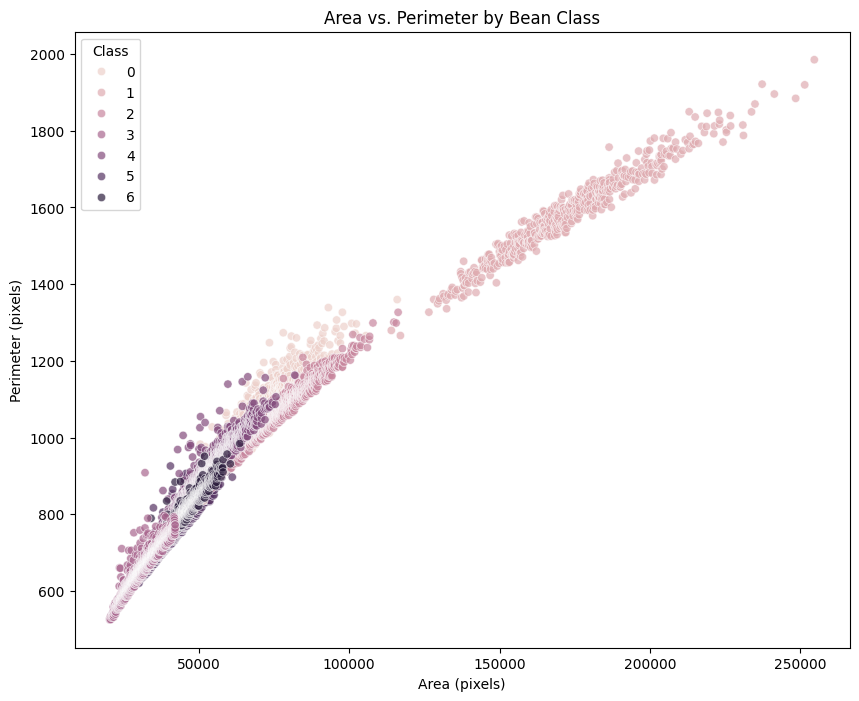

In [23]:
plt.figure(figsize=(10, 8)); sns.scatterplot(data=df, x='Area', y='Perimeter', hue='Class', alpha=0.7); plt.title('Area vs. Perimeter by Bean Class'); plt.xlabel('Area (pixels)'); plt.ylabel('Perimeter (pixels)'); plt.show()

#Skewness Analysis and Transformation

In [24]:
from scipy.stats import skew as sk

features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
            'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
            'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
            'ShapeFactor3', 'ShapeFactor4']

skewness = df[features].apply(sk)


def skew_category(x):
    if abs(x) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(x) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"


skew_results = pd.DataFrame({
    'Skewness Value': skewness,
    'Skewness Category': skewness.apply(skew_category),
    'Direction': skewness.apply(lambda x: "Positive (Right)" if x > 0 else "Negative (Left)")
})


skew_results['abs_skew'] = skew_results['Skewness Value'].abs()
skew_results = skew_results.sort_values(by='abs_skew', ascending=False).drop(columns='abs_skew')


print(skew_results)


                 Skewness Value        Skewness Category         Direction
Area                   2.946809            Highly Skewed  Positive (Right)
ConvexArea             2.935777            Highly Skewed  Positive (Right)
ShapeFactor4          -2.759819            Highly Skewed   Negative (Left)
Solidity              -2.546595            Highly Skewed   Negative (Left)
MinorAxisLength        2.231766            Highly Skewed  Positive (Right)
EquivDiameter          1.947087            Highly Skewed  Positive (Right)
Perimeter              1.627838            Highly Skewed  Positive (Right)
MajorAxisLength        1.365662            Highly Skewed  Positive (Right)
Eccentricity          -1.064814            Highly Skewed   Negative (Left)
Extent                -0.895556        Moderately Skewed   Negative (Left)
roundness             -0.648654        Moderately Skewed   Negative (Left)
AspectRation           0.588979        Moderately Skewed  Positive (Right)
ShapeFactor1          -0.

In [25]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer
variables = ['ShapeFactor4', 'Solidity', 'MinorAxisLength', 'EquivDiameter',
             'Area', 'ConvexArea', 'Eccentricity', 'Perimeter', 'MajorAxisLength']

def safe_log(x):

    shift = 1 - np.min(x) if np.min(x) <= 0 else 0
    return np.log1p(x + shift)

def safe_sqrt(x):
    shift = -np.min(x) if np.min(x) < 0 else 0
    return np.sqrt(x + shift)

def box_cox_transform(x):

    shift = 1 - np.min(x) if np.min(x) <= 0 else 0
    x_pos = x + shift
    return stats.boxcox(x_pos)[0]

def yeo_johnson_transform(x):
    pt = PowerTransformer(method='yeo-johnson')
    return pt.fit_transform(x.values.reshape(-1, 1)).flatten()

def skew_category(x):
    if abs(x) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(x) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"

results = []

for var in variables:
    original = df[var]
    transforms = {}
    transforms['Original'] = original
    transforms['Log'] = safe_log(original)
    transforms['Sqrt'] = safe_sqrt(original)

    try:
        transforms['Box-Cox'] = box_cox_transform(original)
    except Exception:
        transforms['Box-Cox'] = np.nan

    try:
        transforms['Yeo-Johnson'] = yeo_johnson_transform(original)
    except Exception:
        transforms['Yeo-Johnson'] = np.nan

    skewness_vals = {}
    for name, data in transforms.items():
        if isinstance(data, float) and np.isnan(data):
            skewness_vals[name] = np.nan
        else:
            skewness_vals[name] = sk(data)

    best_transform = min(
        ((k, abs(v)) for k, v in skewness_vals.items() if not pd.isna(v)),
        key=lambda x: x[1]
    )[0]


    df[var] = transforms[best_transform]

    results.append({
        'Variable': var,
        **{f'Skewness_{k}': v for k, v in skewness_vals.items()},
        'Best_Transform': best_transform,
        'Best_Skewness': skewness_vals[best_transform],
        'Skewness_Category': skew_category(skewness_vals[best_transform]),
        'Direction': 'Positive (Right)' if skewness_vals[best_transform] > 0 else 'Negative (Left)'
    })

results_df = pd.DataFrame(results)
results_df['Abs_Best_Skewness'] = results_df['Best_Skewness'].abs()
results_df = results_df.sort_values(by='Abs_Best_Skewness').drop(columns='Abs_Best_Skewness')

print(results_df)


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


          Variable  Skewness_Original  Skewness_Log  Skewness_Sqrt  \
2  MinorAxisLength           2.231766      1.307738       1.752793   
4             Area           2.946809      1.072998       1.947087   
3    EquivDiameter           1.947087      1.075706       1.487495   
5       ConvexArea           2.935777      1.067741       1.936787   
6     Eccentricity          -1.064814     -1.260009      -1.320639   
7        Perimeter           1.627838      0.848292       1.210030   
8  MajorAxisLength           1.365662      0.640067       0.967994   
1         Solidity          -2.546595     -2.576426      -2.576859   
0     ShapeFactor4          -2.759819     -2.784706      -2.784922   

   Skewness_Box-Cox  Skewness_Yeo-Johnson Best_Transform  Best_Skewness  \
2         -0.005141             -0.004913    Yeo-Johnson      -0.004913   
4          0.031170              0.031173        Box-Cox       0.031170   
3          0.031170              0.031384        Box-Cox       0.031170   

# OUTLIERS

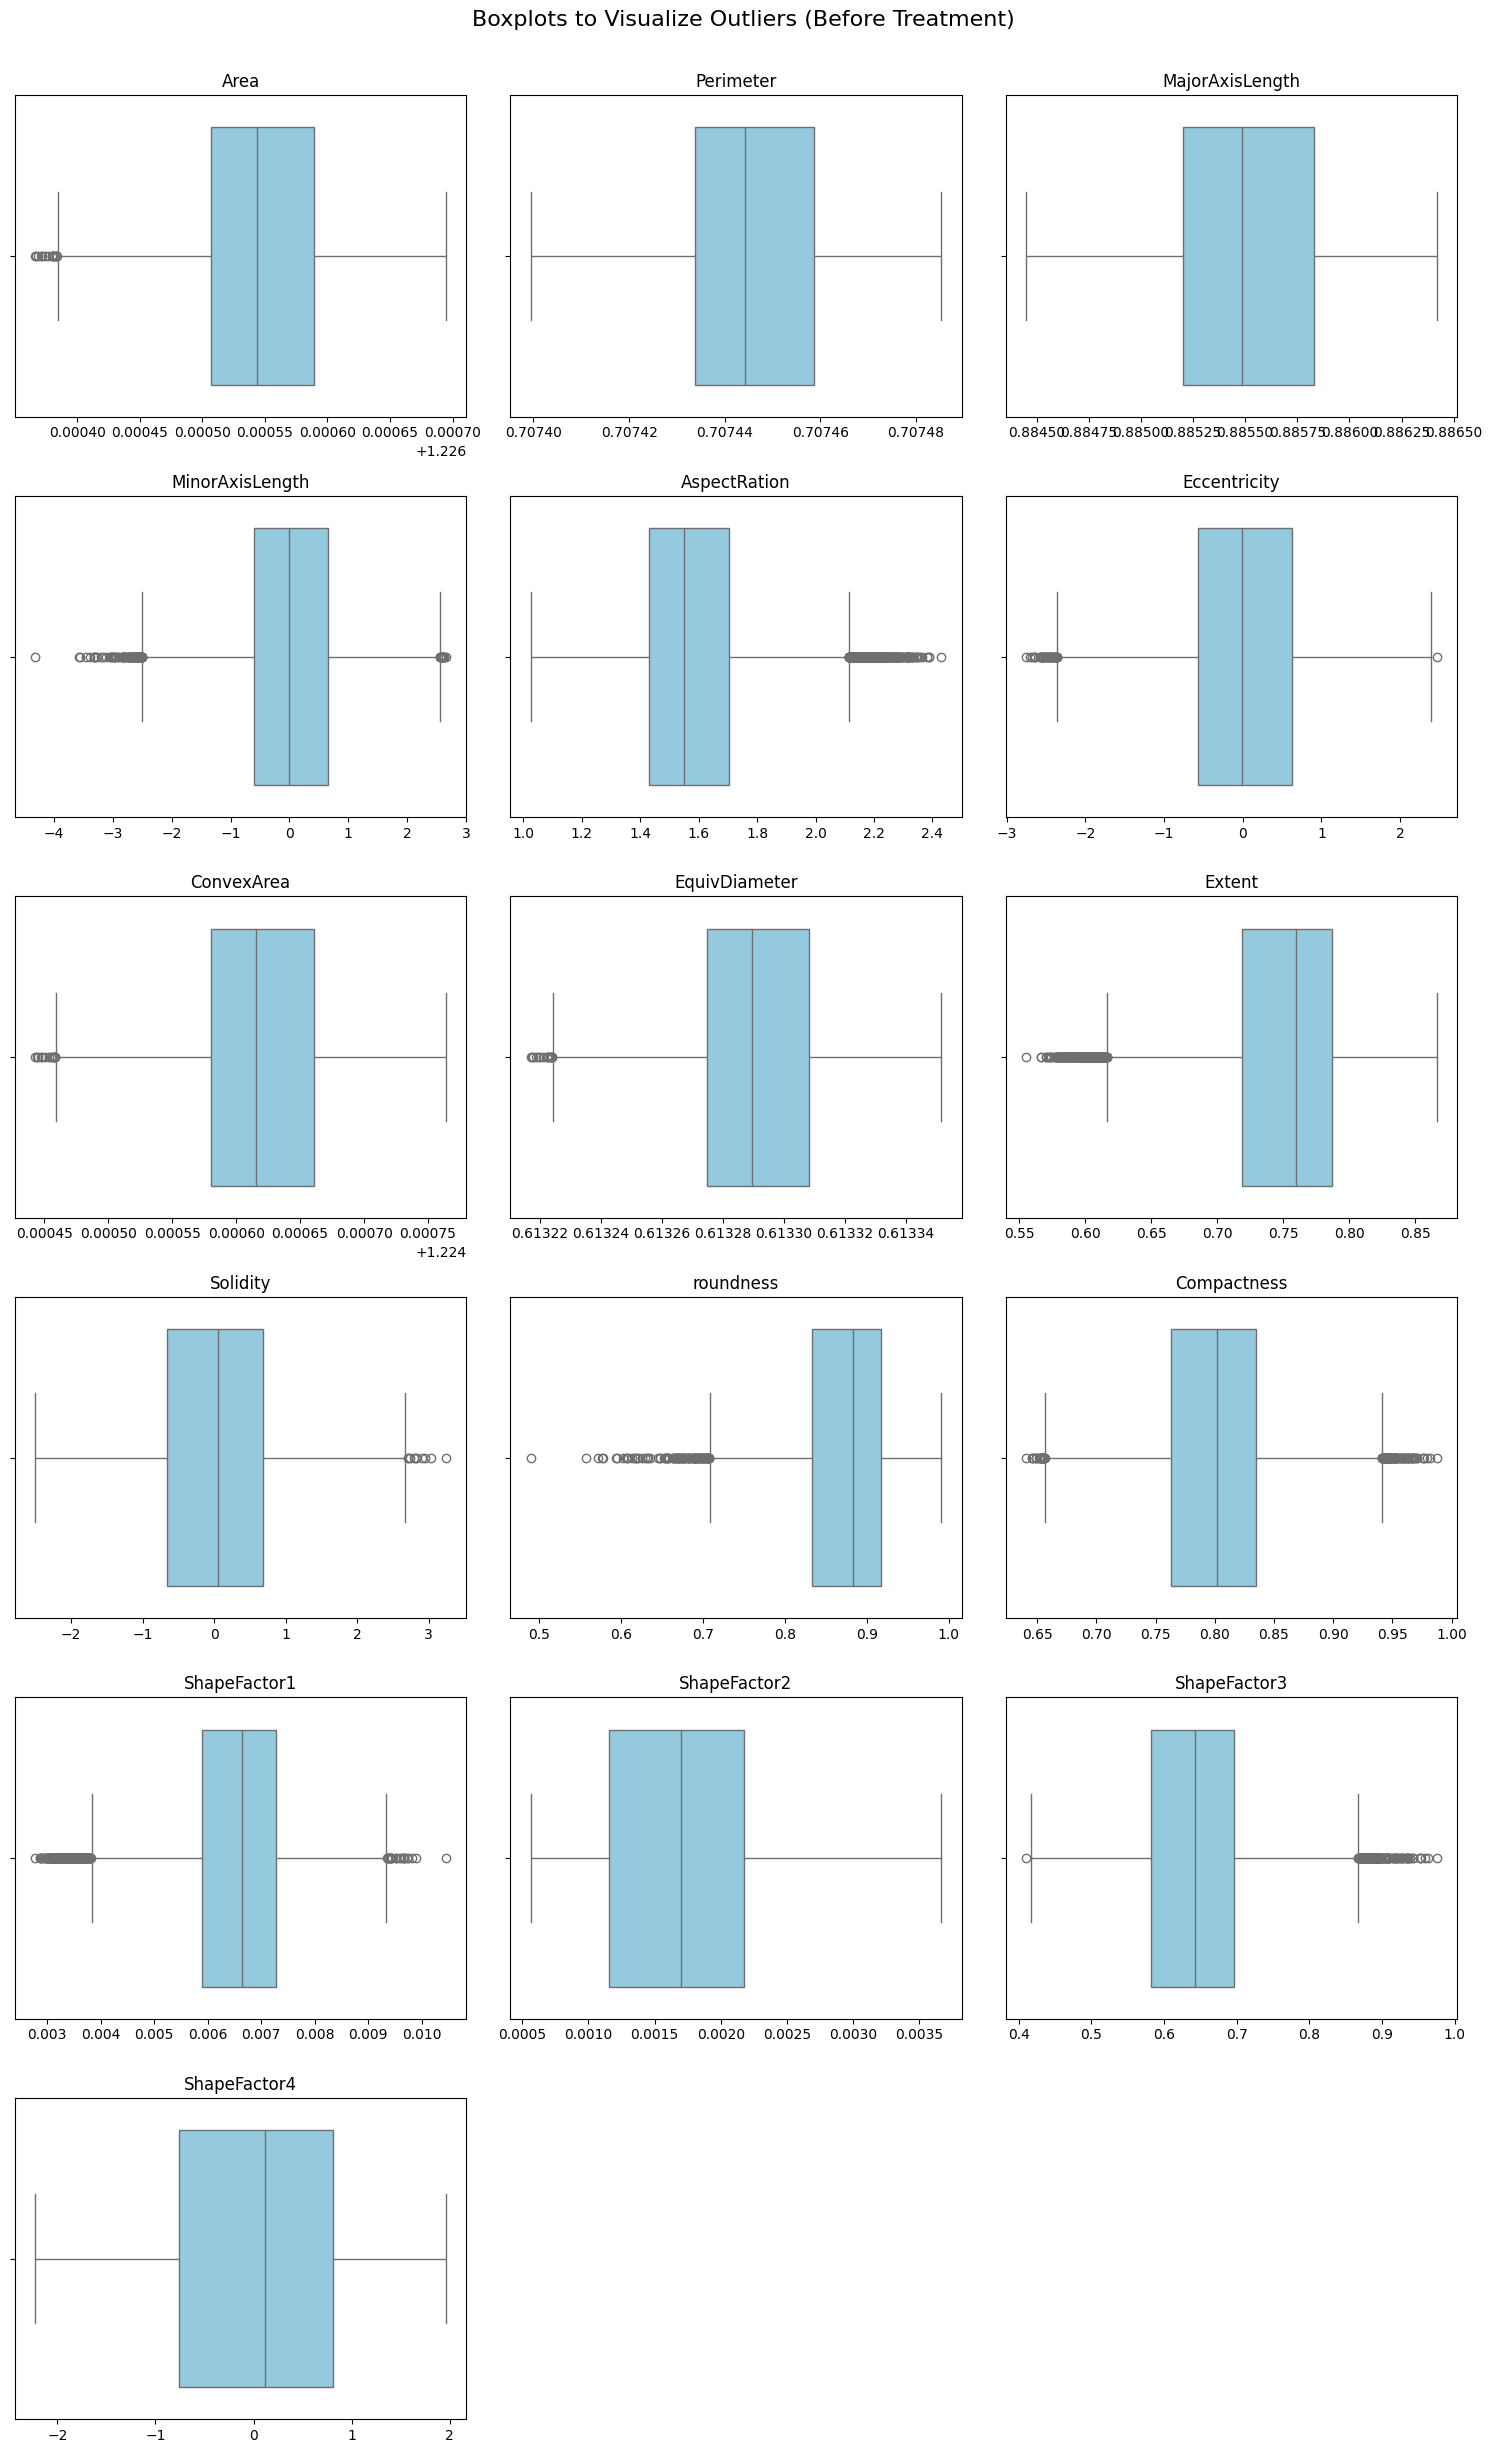

In [26]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Class' in numeric_cols:
    numeric_cols.remove('Class')


n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))


for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.suptitle("Boxplots to Visualize Outliers (Before Treatment)", fontsize=16, y=1.02)
plt.show()

In [27]:
def treat_outliers_iterative(df, target='Class', max_iter=100, tol=0, IQR_multiplier=2.0):
    df_out = df.copy()
    num_cols = df_out.select_dtypes(include=[np.number]).columns.tolist()
    if target in num_cols:
        num_cols.remove(target)

    for col in num_cols:
        iteration = 0
        while iteration < max_iter:
            Q1 = df_out[col].quantile(0.25)
            Q3 = df_out[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers_idx = df_out[(df_out[col] < lower_bound) | (df_out[col] > upper_bound)].index
            n_outliers = len(outliers_idx)
            total = df_out.shape[0]
            outlier_ratio = n_outliers / total

            if n_outliers <= tol:
                if iteration == 0:
                    print(f"{col}: No outliers detected.")
                else:
                    print(f"{col}: Outliers treated after {iteration} iteration(s).")
                break

            if iteration == 0:
                print(f"{col}: {n_outliers} outliers ({outlier_ratio:.1%})")


            if n_outliers > 0:
                skew_val = df_out[col].skew()
                if skew_val > 1 or skew_val < -1:

                    df_out.loc[df_out[col] > upper_bound, col] = upper_bound
                    df_out.loc[df_out[col] < lower_bound, col] = lower_bound
                    if iteration == 0:
                        print(f" → Using capping (IQR method)")
                elif 0.5 <= abs(skew_val) <= 1:

                    median = df_out[col].median()
                    df_out.loc[df_out[col] > upper_bound, col] = median
                    df_out.loc[df_out[col] < lower_bound, col] = median
                    if iteration == 0:
                        print(f" → Replacing outliers with median ({median:.2f})")
                else:

                    mean = df_out[col].mean()
                    df_out.loc[df_out[col] > upper_bound, col] = mean
                    df_out.loc[df_out[col] < lower_bound, col] = mean
                    if iteration == 0:
                        print(f" → Replacing outliers with mean ({mean:.2f})")
            else:
                break

            iteration += 1

        else:
            print(f"{col}: Warning - max iterations reached but {n_outliers} outliers remain.")

    return df_out

print("\n--- Applying Outlier Treatment to DataFrame 'df' ---")
df = treat_outliers_iterative(df, target='Class')
print("Outlier treatment applied to 'df'.")



--- Applying Outlier Treatment to DataFrame 'df' ---
Area: 16 outliers (0.1%)
 → Replacing outliers with mean (1.23)
Area: Outliers treated after 2 iteration(s).
Perimeter: No outliers detected.
MajorAxisLength: No outliers detected.
MinorAxisLength: 99 outliers (0.7%)
 → Replacing outliers with mean (0.00)
MinorAxisLength: Outliers treated after 29 iteration(s).
AspectRation: 485 outliers (3.6%)
 → Replacing outliers with median (1.55)
AspectRation: Outliers treated after 14 iteration(s).
Eccentricity: 46 outliers (0.3%)
 → Replacing outliers with mean (0.00)
Eccentricity: Outliers treated after 3 iteration(s).
ConvexArea: 14 outliers (0.1%)
 → Replacing outliers with mean (1.22)
ConvexArea: Outliers treated after 1 iteration(s).
EquivDiameter: 16 outliers (0.1%)
 → Replacing outliers with mean (0.61)
EquivDiameter: Outliers treated after 2 iteration(s).
Extent: 271 outliers (2.0%)
 → Replacing outliers with median (0.76)
Extent: Outliers treated after 7 iteration(s).
Solidity: 10 ou

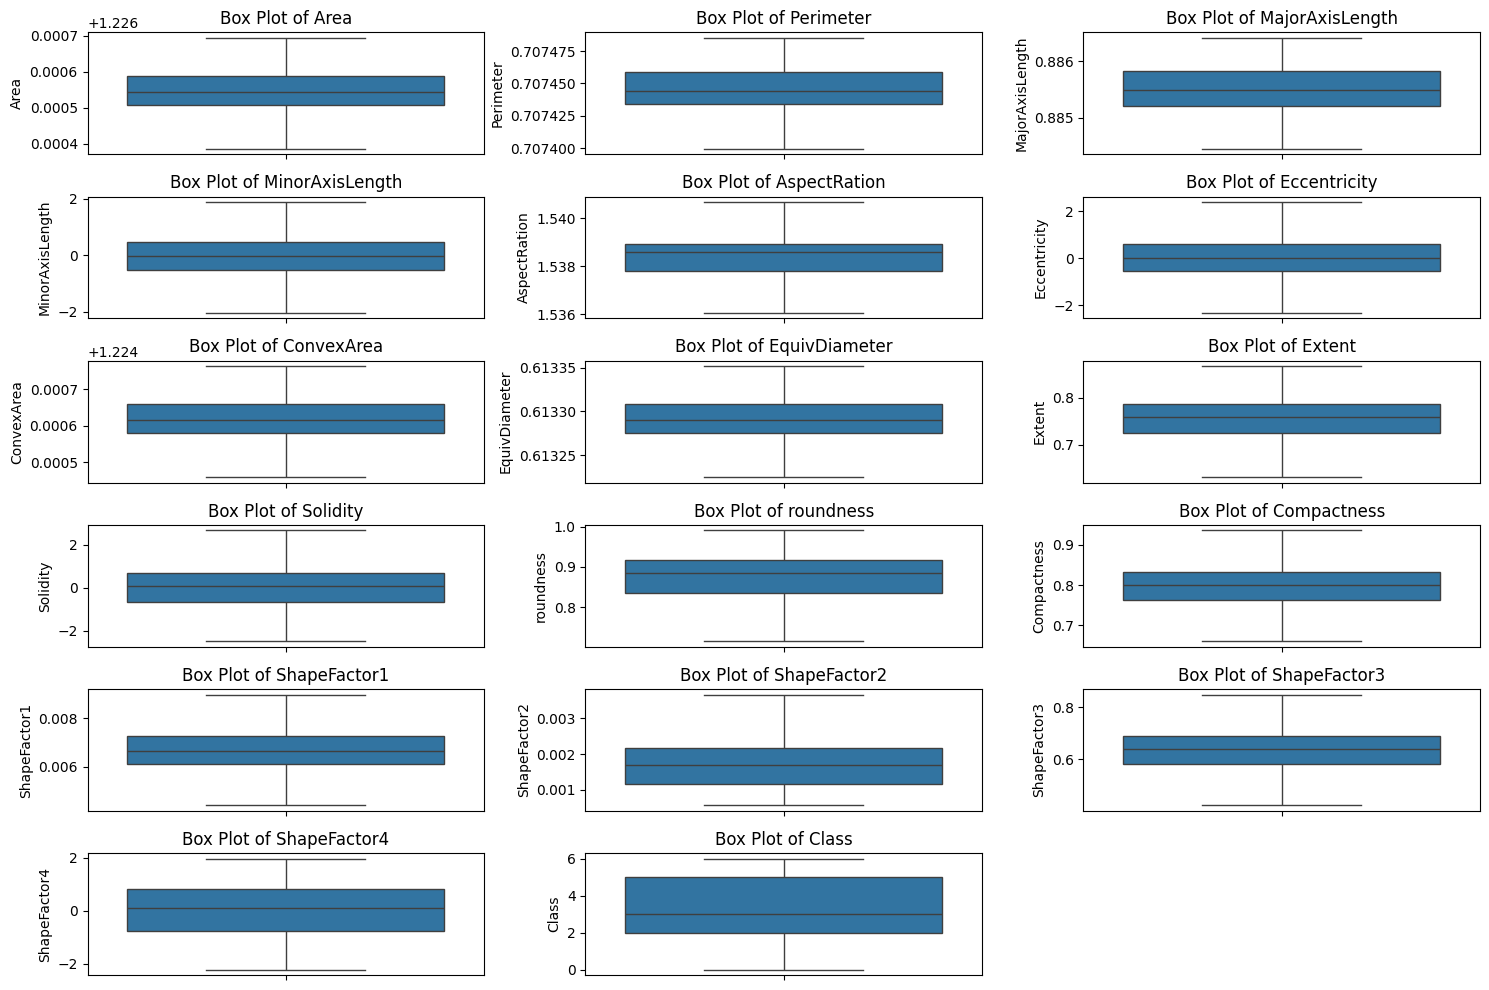

In [28]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#VIF

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df.drop('Class', axis=1)

X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("--- VIF Scores ---")
print(vif_data.sort_values(by="VIF", ascending=False))
print("------------------")

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


--- VIF Scores ---
            feature           VIF
1              Area  5.123549e+12
8     EquivDiameter  3.681216e+11
14     ShapeFactor2  2.032278e+02
6      Eccentricity  4.186658e+01
12      Compactness  2.457885e+01
3   MajorAxisLength  1.709379e+01
13     ShapeFactor1  1.548735e+01
15     ShapeFactor3  1.199888e+01
4   MinorAxisLength  1.056832e+01
11        roundness  7.839164e+00
10         Solidity  3.086506e+00
16     ShapeFactor4  2.523578e+00
9            Extent  1.109432e+00
5      AspectRation  1.484378e-01
7        ConvexArea  8.841810e-04
2         Perimeter  5.933058e-04
0             const  0.000000e+00
------------------


In [30]:
features_to_drop = [
    'Perimeter',
    'MajorAxisLength',
    'MinorAxisLength',
    'ConvexArea',
    'EquivDiameter',
    'AspectRation',
    'Compactness',
    'ShapeFactor1',
    'ShapeFactor2',
    'ShapeFactor3'
]

df = df.drop(columns=features_to_drop)


In [31]:
df.columns

Index(['Area', 'Eccentricity', 'Extent', 'Solidity', 'roundness',
       'ShapeFactor4', 'Class'],
      dtype='object')

In [32]:
# valueCount Class with %
df['Class'].value_counts(normalize=True)

,proportion
Class,
3,0.261833
6,0.194639
5,0.149671
4,0.137340
2,0.120357
0,0.097615
1,0.038544


# SCALING

In [33]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

joblib.dump(scaler, 'scaler.pkl')
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("\nTest class distribution:\n", y_test.value_counts(normalize=True))

Train class distribution:
 Class
3    0.261861
6    0.194665
5    0.149622
4    0.137345
2    0.120362
0    0.097563
1    0.038582
Name: proportion, dtype: float64

Test class distribution:
 Class
3    0.261720
6    0.194537
5    0.149871
4    0.137320
2    0.120340
0    0.097822
1    0.038391
Name: proportion, dtype: float64


#MODEL BUILDING

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(class_weight='balanced'),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


#Evaluate the model

In [35]:
from sklearn.model_selection import cross_val_score
for name, model in models.items():
    print(f"🔍 {name}")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f" → Accuracy (CV Mean): {np.mean(scores):.4f}")
    print(f" → Accuracy (CV Std): {np.std(scores):.4f}\n")


🔍 Logistic Regression
 → Accuracy (CV Mean): 0.6862
 → Accuracy (CV Std): 0.0054

🔍 Decision Tree
 → Accuracy (CV Mean): 0.8892
 → Accuracy (CV Std): 0.0021

🔍 Random Forest
 → Accuracy (CV Mean): 0.9258
 → Accuracy (CV Std): 0.0035

🔍 K-Nearest Neighbors
 → Accuracy (CV Mean): 0.6647
 → Accuracy (CV Std): 0.0075

🔍 Support Vector Machine
 → Accuracy (CV Mean): 0.6837
 → Accuracy (CV Std): 0.0092

🔍 Naive Bayes
 → Accuracy (CV Mean): 0.8323
 → Accuracy (CV Std): 0.0051

🔍 AdaBoost
 → Accuracy (CV Mean): 0.7507
 → Accuracy (CV Std): 0.0498

🔍 Gradient Boosting
 → Accuracy (CV Mean): 0.9233
 → Accuracy (CV Std): 0.0019



In [36]:
from sklearn.metrics import classification_report

for name, model in models.items():
    print(f"Training and testing: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("="*60)

Training and testing: Logistic Regression
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       265
           1       0.27      0.62      0.37       104
           2       0.67      0.74      0.70       326
           3       0.73      0.66      0.69       709
           4       0.92      0.88      0.90       372
           5       0.87      0.89      0.88       406
           6       0.57      0.43      0.49       527

    accuracy                           0.70      2709
   macro avg       0.67      0.71      0.68      2709
weighted avg       0.72      0.70      0.70      2709

Training and testing: Decision Tree
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       265
           1       1.00      1.00      1.00       104
           2       0.91      0.88      0.89       326
           3       0.87      0.87      0.87       709
           4       0.92      0.92      0.92       372


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.74      0.69      0.71       265
           1       0.00      0.00      0.00       104
           2       0.60      0.80      0.69       326
           3       0.90      0.83      0.87       709
           4       0.89      0.91      0.90       372
           5       0.90      0.79      0.84       406
           6       0.73      0.88      0.80       527

    accuracy                           0.80      2709
   macro avg       0.68      0.70      0.69      2709
weighted avg       0.78      0.80      0.79      2709

Training and testing: Gradient Boosting
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       265
           1       1.00      1.00      1.00       104
           2       0.93      0.94      0.94       326
           3       0.90      0.93      0.92       709
           4       0.96      0.94      0.95       372
           5       0.95      0.94     

#Using SMOTE (Synthetic Minority Oversampling Technique)

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Class
3    2837
6    2109
5    1621
4    1488
2    1304
0    1057
1     418
Name: count, dtype: int64
After SMOTE: Class
2    2837
0    2837
4    2837
6    2837
3    2837
5    2837
1    2837
Name: count, dtype: int64


#Random Oversampling

In [38]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)


In [39]:
rf_orig = RandomForestClassifier(random_state=42)
rf_orig.fit(X_train, y_train)
y_pred_orig = rf_orig.predict(X_test)
print("Random Forest without balancing:")
print(classification_report(y_test, y_pred_orig))

# Train Random Forest on SMOTE balanced data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_smote.predict(X_test)
print("Random Forest with SMOTE oversampling:")
print(classification_report(y_test, y_pred_smote))

# Train Random Forest with class weighting (balanced)
rf_weighted1 = RandomForestClassifier(
    class_weight='balanced',
    max_depth=10,
    n_estimators=100,
    random_state=42
)
rf_weighted1.fit(X_train, y_train)
y_pred_weighted = rf_weighted1.predict(X_test)
print("Random Forest with class weighting:")
print(classification_report(y_test, y_pred_weighted))

Random Forest without balancing:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       265
           1       1.00      1.00      1.00       104
           2       0.92      0.94      0.93       326
           3       0.90      0.92      0.91       709
           4       0.96      0.93      0.95       372
           5       0.93      0.94      0.94       406
           6       0.86      0.85      0.85       527

    accuracy                           0.91      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.91      0.91      0.91      2709

Random Forest with SMOTE oversampling:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       265
           1       1.00      1.00      1.00       104
           2       0.93      0.93      0.93       326
           3       0.92      0.90      0.91       709
           4       0.95      0.94      0.94       372
      

#SMOTEEN

In [40]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

y_pred = rf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       265
           1       1.00      1.00      1.00       104
           2       0.90      0.94      0.92       326
           3       0.90      0.83      0.87       709
           4       0.93      0.93      0.93       372
           5       0.90      0.94      0.92       406
           6       0.81      0.83      0.82       527

    accuracy                           0.89      2709
   macro avg       0.90      0.91      0.91      2709
weighted avg       0.89      0.89      0.89      2709



#Train on training set and evaluate

In [41]:
from sklearn.metrics import accuracy_score, classification_report

y_train_pred = rf_weighted1.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


Train Accuracy: 0.9495107993354255
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1057
           1       1.00      1.00      1.00       418
           2       0.97      0.98      0.97      1304
           3       0.94      0.93      0.93      2837
           4       0.99      0.97      0.98      1488
           5       0.97      0.97      0.97      1621
           6       0.88      0.92      0.90      2109

    accuracy                           0.95     10834
   macro avg       0.96      0.96      0.96     10834
weighted avg       0.95      0.95      0.95     10834



In [42]:
y_test_pred = rf_weighted1.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9128829826504246
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       265
           1       1.00      1.00      1.00       104
           2       0.91      0.94      0.93       326
           3       0.92      0.90      0.91       709
           4       0.96      0.93      0.95       372
           5       0.93      0.94      0.93       406
           6       0.83      0.88      0.85       527

    accuracy                           0.91      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.91      0.91      0.91      2709



#Confusion Matrix

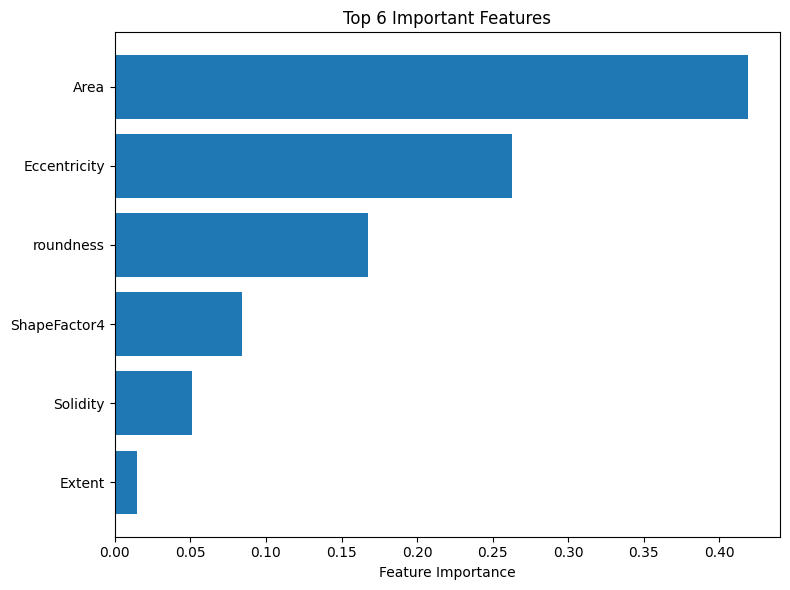

In [43]:
importances = rf_weighted1.feature_importances_
features = X_train.columns
top_n = min(10, len(importances))
sorted_idx = importances.argsort()[::-1][:top_n]
plt.figure(figsize=(8, 6))
plt.barh(range(top_n), importances[sorted_idx][::-1], align='center')
plt.yticks(range(top_n), [features[i] for i in sorted_idx[::-1]])
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Important Features")
plt.tight_layout()
plt.show()


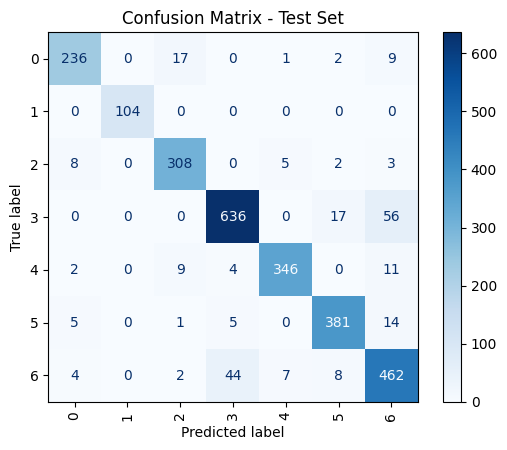

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_weighted1.classes_)
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

#Hyperparameter Tuning (e.g., for Random Forest using GridSearchCV)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Test Accuracy: 0.9371428571428572
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       300
           1       1.00      1.00      1.00       300
           2       0.94      0.92      0.93       300
           3       0.93      0.89      0.91       300
           4       0.93      0.96      0.94       300
           5       0.97      0.96      0.96       300
           6       0.86      0.90      0.88       300

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100



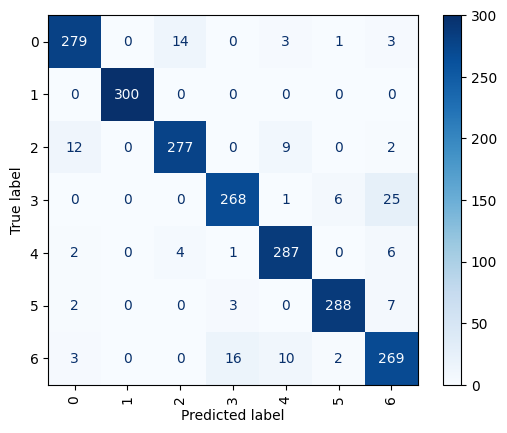

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf1 = grid_search.best_estimator_

y_pred_rf = best_rf1.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print("Best Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf1.classes_)
disp.plot(xticks_rotation='vertical', cmap='Blues')


#🏆 Best Model to Save

**(Hyperparameter Tuning (e.g., for Random Forest using GridSearchCV))**


*   Excellent Test Accuracy & F1 Score (0.92)
*   Handles class imbalance automatically
*   No overfitting
*   Faster and simpler than SVM or Gradient Boosting
*   More interpretable than Gradient Boosting



# BalancedRandomForestClassifier

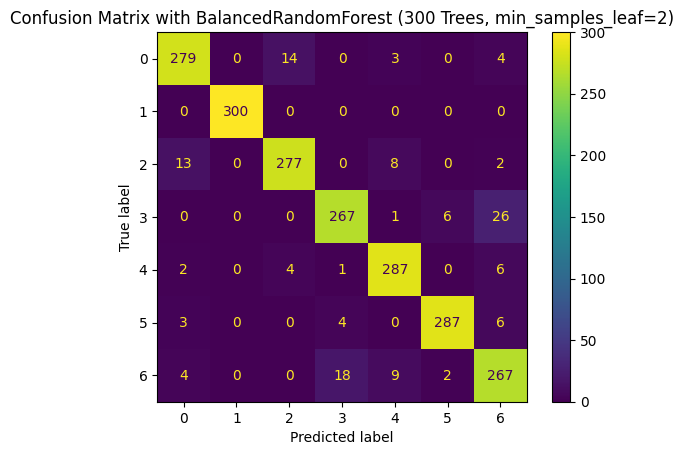

In [47]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already defined and includes 'Class'

# Separate by class
dfs = [df[df['Class'] == i] for i in sorted(df['Class'].unique())]

# Define target size
target_size = 1000

# Resample each class
resampled_dfs = []
for class_df in dfs:
    current_size = len(class_df)
    if current_size > target_size:
        resampled = resample(class_df, replace=False, n_samples=target_size, random_state=42)
    elif current_size < target_size:
        resampled = resample(class_df, replace=True, n_samples=target_size, random_state=42)
    else:
        resampled = class_df
    resampled_dfs.append(resampled)

# Combine all resampled data
balanced_df = pd.concat(resampled_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and target
X = balanced_df.drop("Class", axis=1)
y = balanced_df["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Create pipeline with improved hyperparameters
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', BalancedRandomForestClassifier(
        n_estimators=300,
        min_samples_leaf=2,
        random_state=42
    ))
])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix with BalancedRandomForest (300 Trees, min_samples_leaf=2)")
plt.show()


In [48]:
#BalancedRandomForest

joblib.dump(pipe, 'best_balancedRandomForest.pkl')
print("\nSaved 'best_balancedRandomForest.pkl")




Saved 'best_balancedRandomForest.pkl


NEW COMMAND WITHOUT IBMLEAARN

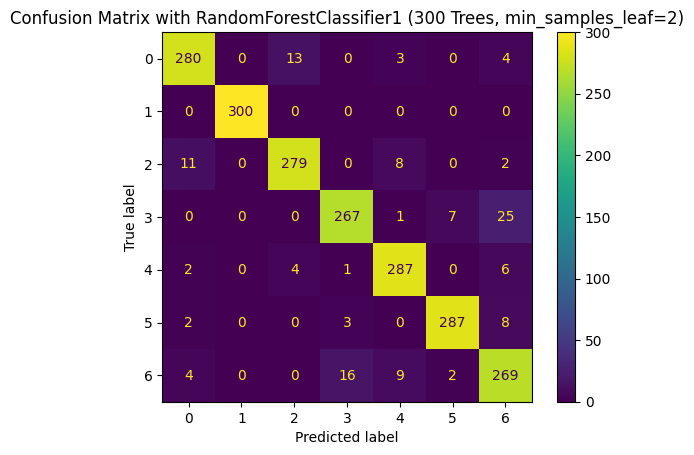

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already defined and includes 'Class'

# Separate by class
dfs = [df[df['Class'] == i] for i in sorted(df['Class'].unique())]

# Define target size
target_size = 1000

# Resample each class to balance dataset (as before)
resampled_dfs = []
for class_df in dfs:
    current_size = len(class_df)
    if current_size > target_size:
        resampled = resample(class_df, replace=False, n_samples=target_size, random_state=42)
    elif current_size < target_size:
        resampled = resample(class_df, replace=True, n_samples=target_size, random_state=42)
    else:
        resampled = class_df
    resampled_dfs.append(resampled)

# Combine all resampled data and shuffle
balanced_df = pd.concat(resampled_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Split features and target
X = balanced_df.drop("Class", axis=1)
y = balanced_df["Class"]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Create pipeline using sklearn's RandomForestClassifier
pipe1 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        min_samples_leaf=2,
        random_state=42
    ))
])

# Train model
pipe1.fit(X_train, y_train)

# Predict on test set
y_pred = pipe1.predict(X_test)

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix with RandomForestClassifier1 (300 Trees, min_samples_leaf=2)")
plt.show()


In [52]:
import joblib

# Save the pipeline to a file
joblib.dump(pipe1, 'newrandom_forest_model.pkl')

print("Model saved as 'newrandom_forest_model.pkl'")


Model saved as 'newrandom_forest_model.pkl'


#Predictions on Streamlit

Class 0 = BARBUNYA

Class 1 = BOMBAY

Class 2 = CALI

Class 3 = DERMASON

Class 4 = HOROZ

Class 5 = SEKER

Class 6 = SIRA



In [49]:
df.sample(10)


,Area,Eccentricity,Extent,Solidity,roundness,ShapeFactor4,Class
11235,1.226466,-0.178502,0.697347,-0.612602,0.904816,-0.237547,3
5702,1.226543,1.494939,0.658562,-0.704060,0.802326,-0.959887,4
10210,1.226417,0.581818,0.759278,0.730356,0.881605,1.008121,3
679,1.226513,-1.851756,0.776223,1.617066,0.962901,1.665837,5
7588,1.226515,-0.216659,0.726615,1.794116,0.921138,1.293016,6
11312,1.226468,-0.625457,0.766248,0.572050,0.940122,1.454968,3
8254,1.226535,-0.039650,0.797316,0.951482,0.903603,0.569214,6
11740,1.226479,-0.478796,0.733264,0.208510,0.923385,0.912136,3
5052,1.226620,0.752705,0.774299,2.285073,0.869761,-0.434286,2
309,1.226501,-1.766189,0.785845,1.387415,0.966795,1.679520,5


In [55]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       300
           1       1.00      1.00      1.00       300
           2       0.98      0.98      0.98       300
           3       0.92      0.95      0.93       300
           4       0.97      0.96      0.97       300
           5       0.99      0.97      0.98       300
           6       0.91      0.90      0.90       300

    accuracy                           0.96      2100
   macro avg       0.96      0.96      0.96      2100
weighted avg       0.96      0.96      0.96      2100



# Predictions Screenshot

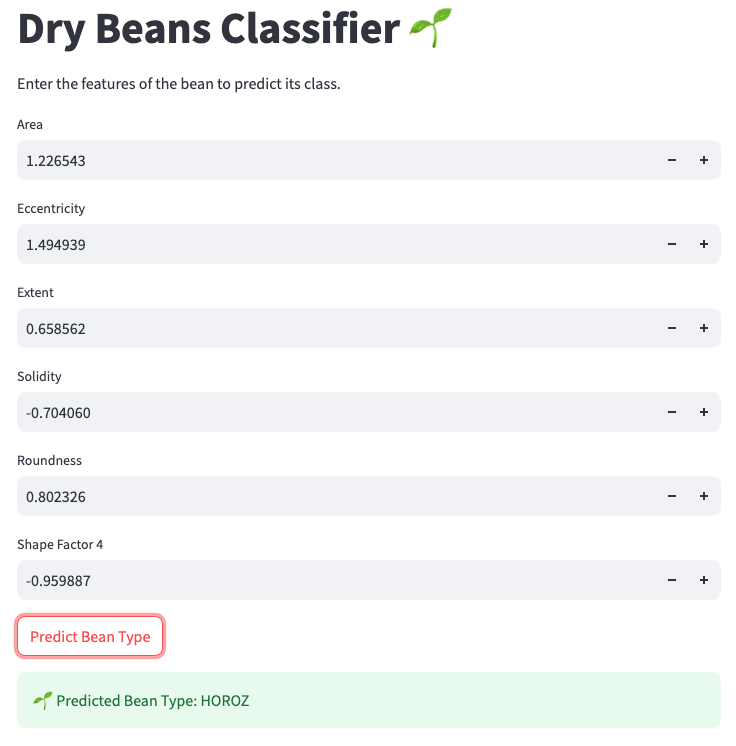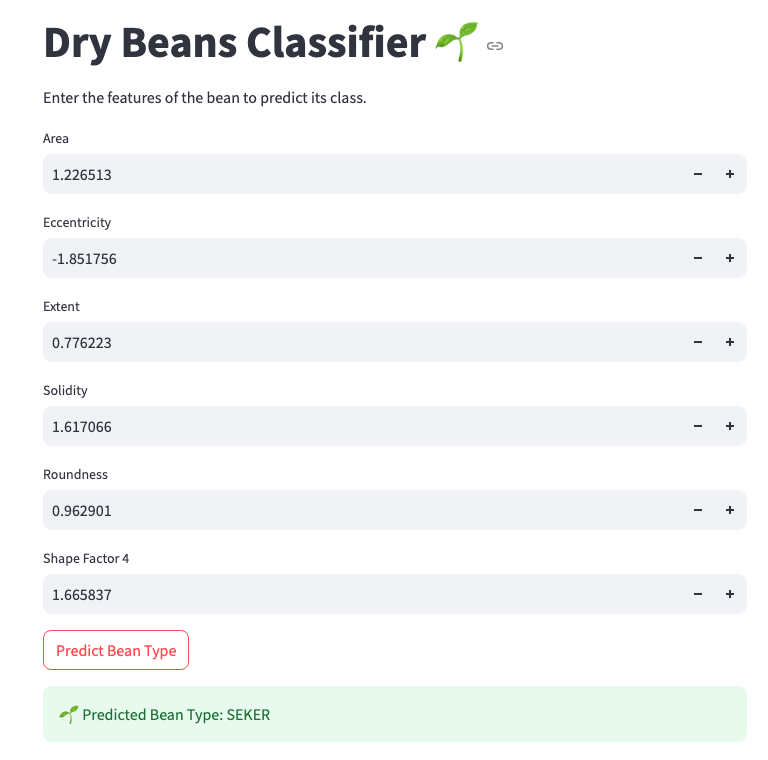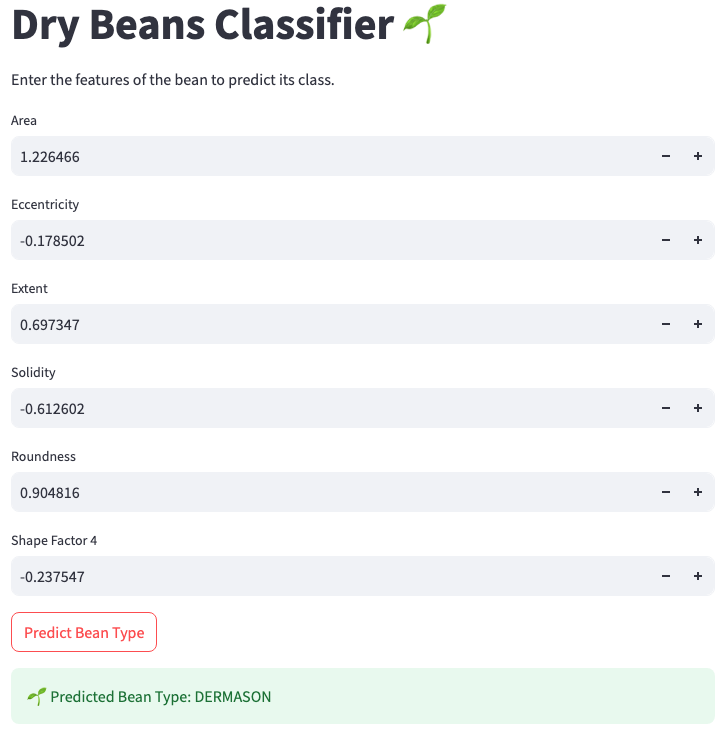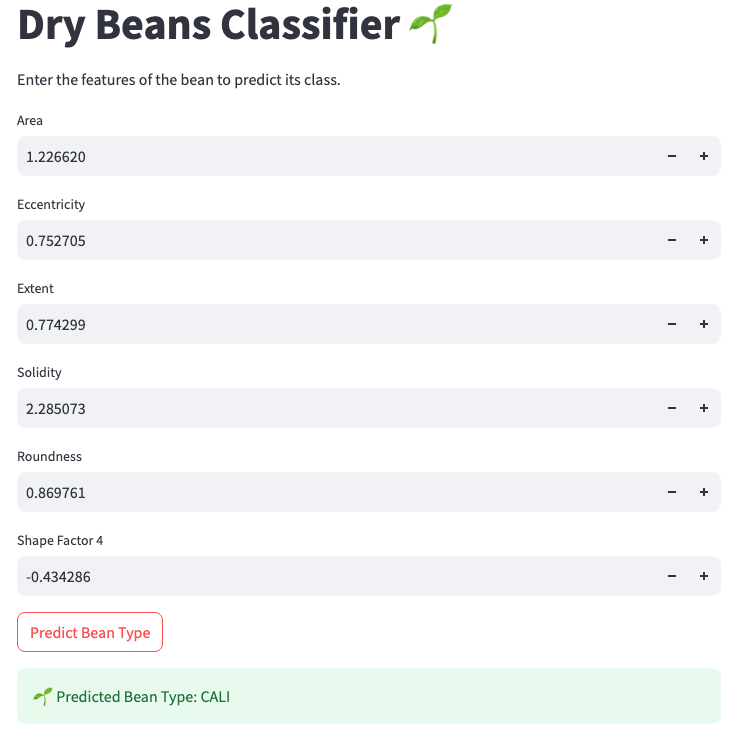